## topics coverd - date time index, resampling

#### date time indexing

In [3]:
import pandas as pd
df = pd.read_csv("apple.csv")
df.head()

,Date,Close/Last,Volume,Open,High,Low
0,10/30/2024,$230.10,47070910,$232.61,$233.47,$229.55
1,10/29/2024,$233.67,35417250,$233.10,$234.325,$232.32
2,10/28/2024,$233.40,36087130,$233.32,$234.73,$232.55
3,10/25/2024,$231.41,38802300,$229.74,$233.22,$229.57
4,10/24/2024,$230.57,31109500,$229.98,$230.82,$228.41


In [4]:
#checking the type of date column
type(df["Date"][0])

str

In [5]:
#parsing the date column
df = pd.read_csv("apple.csv", parse_dates=["Date"])
df.head()

,Date,Close/Last,Volume,Open,High,Low
0,2024-10-30,$230.10,47070910,$232.61,$233.47,$229.55
1,2024-10-29,$233.67,35417250,$233.10,$234.325,$232.32
2,2024-10-28,$233.40,36087130,$233.32,$234.73,$232.55
3,2024-10-25,$231.41,38802300,$229.74,$233.22,$229.57
4,2024-10-24,$230.57,31109500,$229.98,$230.82,$228.41


In [6]:
#again checking the time stampe
type(df["Date"][0])

pandas._libs.tslibs.timestamps.Timestamp

In [7]:
#converting the index column to -> data column i.e data column represent the index now
df = pd.read_csv("apple.csv", parse_dates=["Date"], index_col="Date")
df.head()

,Close/Last,Volume,Open,High,Low
Date,,,,,
2024-10-30,$230.10,47070910,$232.61,$233.47,$229.55
2024-10-29,$233.67,35417250,$233.10,$234.325,$232.32
2024-10-28,$233.40,36087130,$233.32,$234.73,$232.55
2024-10-25,$231.41,38802300,$229.74,$233.22,$229.57
2024-10-24,$230.57,31109500,$229.98,$230.82,$228.41


In [8]:
df.index

DatetimeIndex(['2024-10-30', '2024-10-29', '2024-10-28', '2024-10-25',
               '2024-10-24', '2024-10-23', '2024-10-22', '2024-10-21',
               '2024-10-18', '2024-10-17',
               ...
               '2019-11-13', '2019-11-12', '2019-11-11', '2019-11-08',
               '2019-11-07', '2019-11-06', '2019-11-05', '2019-11-04',
               '2019-11-01', '2019-10-31'],
              dtype='datetime64[ns]', name='Date', length=1258, freq=None)

In [9]:
#to get the stock price in 2020 jan
df.loc['2024-10']["Close/Last"]

Date
2024-10-30    $230.10
2024-10-29    $233.67
2024-10-28    $233.40
2024-10-25    $231.41
2024-10-24    $230.57
2024-10-23    $230.76
2024-10-22    $235.86
2024-10-21    $236.48
2024-10-18    $235.00
2024-10-17    $232.15
2024-10-16    $231.78
2024-10-15    $233.85
2024-10-14    $231.30
2024-10-11    $227.55
2024-10-10    $229.04
2024-10-09    $229.54
2024-10-08    $225.77
2024-10-07    $221.69
2024-10-04    $226.80
2024-10-03    $225.67
2024-10-02    $226.78
2024-10-01    $226.21
Name: Close/Last, dtype: object

In [10]:
#removing the dollar sign from close/last series
df['Close/Last'] = df['Close/Last'].str.replace('$', '').astype(float)

In [11]:
#to get the stock price in 2020 jan
df.loc['2024-10']["Close/Last"].mean()

230.24454545454546

In [12]:
df.loc['2024-10-10']

Close/Last      229.04
Volume        28183540
Open           $227.78
High           $229.50
Low            $227.17
Name: 2024-10-10 00:00:00, dtype: object

#### resampling

In [13]:
df

,Close/Last,Volume,Open,High,Low
Date,,,,,
2024-10-30,230.1000,47070910,$232.61,$233.47,$229.55
2024-10-29,233.6700,35417250,$233.10,$234.325,$232.32
2024-10-28,233.4000,36087130,$233.32,$234.73,$232.55
2024-10-25,231.4100,38802300,$229.74,$233.22,$229.57
2024-10-24,230.5700,31109500,$229.98,$230.82,$228.41
...,...,...,...,...,...
2019-11-06,64.3100,75864480,$64.1925,$64.3725,$63.8413
2019-11-05,64.2825,79897720,$64.2625,$64.5475,$64.08
2019-11-04,64.3750,103271800,$64.3325,$64.4613,$63.845


In [14]:
df["Close/Last"].resample('ME').mean()

Date
2019-10-31     62.190000
2019-11-30     65.630125
2019-12-31     69.131429
2020-01-31     77.979048
2020-02-29     77.817632
                 ...    
2024-06-30    206.263158
2024-07-31    224.598636
2024-08-31    221.638182
2024-09-30    223.758000
2024-10-31    230.244545
Freq: ME, Name: Close/Last, Length: 61, dtype: float64

<Axes: xlabel='Date'>

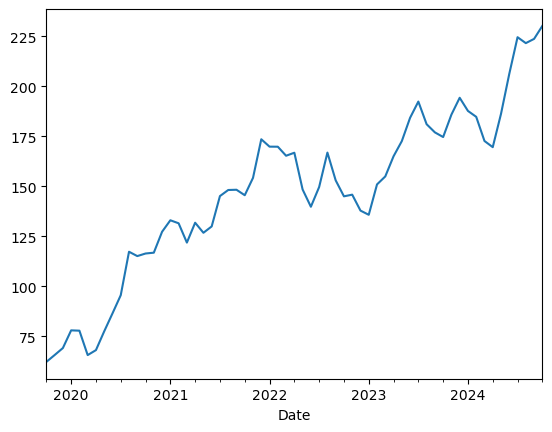

In [15]:
# to plot the above data
%matplotlib inline
df["Close/Last"].resample('ME').mean().plot()